# Machine Learning Notebook: Linear and Ridge Regression, Dimensionality Reduction and Hyperparameter Tuning


In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold

# Set plot style
sns.set(style='whitegrid')

# 1. Introduction

In this notebook, we will explore Linear Regression and Ridge Regression, focusing on hyperparameter tuning
and dimensionality reduction techniques such as PCA (Principal Component Analysis) and Random Projections.
Dimensionality reduction can be helpful when dealing with high-dimensional data, both for efficiency and reducing noise.


In [2]:
# Generate a high-dimensional dataset
X, y = make_regression(n_samples=1000, n_features=999, n_informative=1, noise=20.)

# Add a column of ones to X for the intercept
X = np.c_[np.ones((X.shape[0], 1)), X]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

Linear regression is a method used to model the relationship between a dependent variable $y$ and one or more independent variables $X$. The model assumes a linear relationship between the inputs and the output:

$$
y = X\beta + \epsilon
$$

Where:

- $X$ is the matrix of input features (with each row representing a data point).
    
- $\beta$ are the coefficients (parameters) we want to estimate.
    
- $\epsilon$ is the error term (assumed to be normally distributed).

The goal of linear regression is to find the parameters $\beta$ that minimize the sum of squared errors (SSE):

$$
\text{SSE} = \sum_{i=1}^n (y_i - X_i \beta)^2
$$

This minimization problem is solved by computing the ordinary least squares (OLS) estimate:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

This equation gives the optimal parameters $\beta$ that minimize the prediction error.

**Question 1** : Implement the linear regression using the class sklearn.linear_model.LinearRegression.

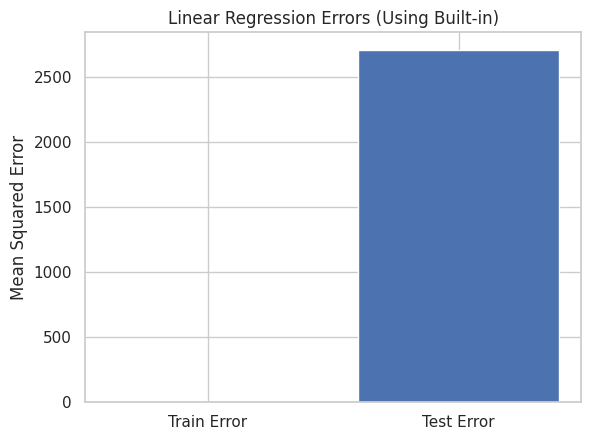

In [3]:
# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Compute errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Plot train and test errors
plt.bar(['Train Error', 'Test Error'], [train_error, test_error])
plt.ylabel('Mean Squared Error')
plt.title('Linear Regression Errors (Using Built-in)')
plt.show()

**Question 2** : Implement the linear regression by hand (using Numpy functions only).

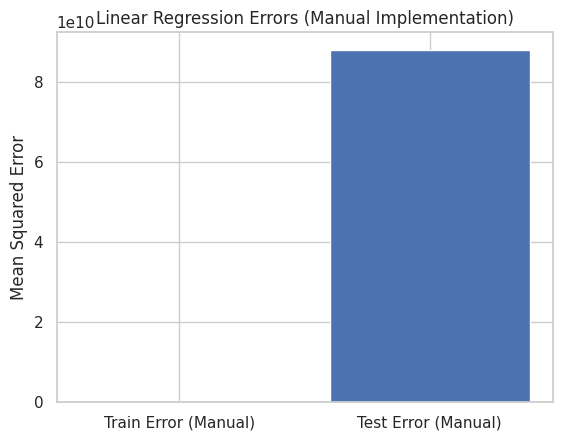

In [4]:
# Compute the OLS estimate of the coefficients
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Make predictions
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
y_train_pred_manual = X_train.dot(theta_best)

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test_pred_manual = X_test.dot(theta_best)

# Compute errors
train_error_manual = mean_squared_error(y_train, y_train_pred_manual)
test_error_manual = mean_squared_error(y_test, y_test_pred_manual)

# Plot train and test errors
plt.bar(['Train Error (Manual)', 'Test Error (Manual)'], [train_error_manual, test_error_manual])
plt.ylabel('Mean Squared Error')
plt.title('Linear Regression Errors (Manual Implementation)')
plt.show()

# Ridge Regression

Ridge Regression is a regularized version of linear regression that addresses multicollinearity and prevents overfitting by adding a penalty term to the cost function. It modifies the linear regression objective by introducing an L2 regularization term to penalize large coefficients:

$$
\text{Ridge Cost Function} = \sum_{i=1}^n (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^p \beta_j^2
$$

Where:

- $\alpha$ is the regularization parameter controlling the penalty strength.
    
- $\beta_j$ are the regression coefficients.

The second term $\alpha \sum_{j=1}^p \beta_j^2$ discourages large values of $\beta$, which helps prevent overfitting in high-dimensional or multicollinear datasets. The solution to the ridge regression is given by:

$$
\hat{\beta}_{\text{ridge}} = (X^T X + \alpha I)^{-1} X^T y
$$

Where $I$ is the identity matrix. The addition of $\alpha I$ ensures that the matrix is invertible, even in cases of multicollinearity.

**Question 1** : Implement the Ridge regression using the function class sklearn.linear_model.Ridge.

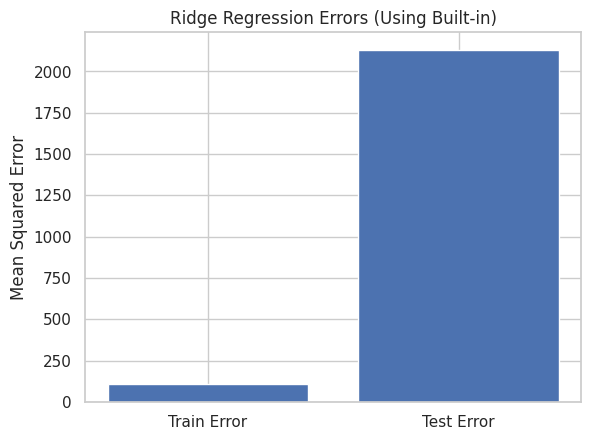

In [5]:
# Train the ridge regression model
ridge_reg = Ridge(alpha=100)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_train_ridge_pred = ridge_reg.predict(X_train)
y_test_ridge_pred = ridge_reg.predict(X_test)

# Compute errors
train_error_ridge = mean_squared_error(y_train, y_train_ridge_pred)
test_error_ridge = mean_squared_error(y_test, y_test_ridge_pred)

# Plot train and test errors
plt.bar(['Train Error', 'Test Error'], [train_error_ridge, test_error_ridge])
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Errors (Using Built-in)')
plt.show()

**Question 2** : Implement the Ridge regression by hand (using Numpy functions only).

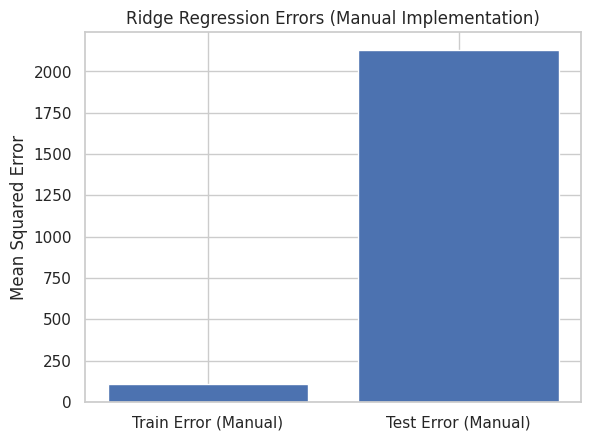

In [6]:
alpha = 100  # Regularization parameter

# Add a column of ones to X for the intercept
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Compute the Ridge estimate of the coefficients
identity_matrix = np.eye(X_b.shape[1])
identity_matrix[0, 0] = 0  # Don't regularize the intercept
theta_ridge = np.linalg.inv(X_b.T.dot(X_b) + alpha * identity_matrix).dot(X_b.T).dot(y_train)

# Make predictions
y_train_ridge_pred_manual = X_b.dot(theta_ridge)
y_test_ridge_pred_manual = X_test_b.dot(theta_ridge)

# Compute errors
train_error_ridge_manual = np.mean((y_train - y_train_ridge_pred_manual) ** 2)
test_error_ridge_manual = np.mean((y_test - y_test_ridge_pred_manual) ** 2)

# Plot train and test errors
plt.bar(['Train Error (Manual)', 'Test Error (Manual)'], [train_error_ridge_manual, test_error_ridge_manual])
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Errors (Manual Implementation)')
plt.show()


**Question 3** : Plot the train and test errors of the model as a function of $\alpha$.

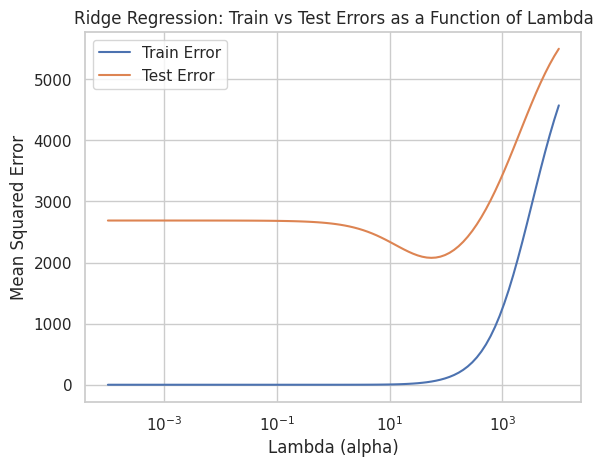

In [7]:
# Range of lambda (alpha) values to test
lambdas = np.logspace(-4, 4, 100)

train_errors = []
test_errors = []

# Loop over different values of lambda
for alpha in lambdas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)

    # Predict for train and test sets
    y_train_pred = ridge_reg.predict(X_train)
    y_test_pred = ridge_reg.predict(X_test)

    # Calculate mean squared errors for train and test sets
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot train and test errors as a function of lambda
plt.plot(lambdas, train_errors, label='Train Error')
plt.plot(lambdas, test_errors, label='Test Error')
plt.xscale('log')  # Log scale for lambda
plt.xlabel('Lambda (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Train vs Test Errors as a Function of Lambda')
plt.legend()
plt.show()

# Hyperparameter Tuning 1 : Optimization over the valitation set

Normal Validation (or train/validation split) is a common approach for evaluating a machine learning model. The dataset is split into two sets:

- Training set: Used to train the model.

- Validation set: Used to evaluate the model's performance on unseen data.

Mathematically, this can be represented as:

$$
X_{\text{train}}, y_{\text{train}} \quad \text{and} \quad X_{\text{val}}, y_{\text{val}}
$$

The model is trained on $(X_{\text{train}}, y_{\text{train}})$ and evaluated on $(X_{\text{val}}, y_{\text{val}})$. This process helps detect overfitting because the model is tested on data that it hasn’t seen during training.

The performance metric (e.g., mean squared error) is calculated on the validation set:

$$
\text{MSE}_{\text{val}} = \frac{1}{n_{\text{val}}} \sum_{i=1}^{n_{\text{val}}} (y_{\text{val}_i} - \hat{y}_{\text{val}_i})^2
$$

This score is then used in hyperparameter tuning and model selection.

**Question** : Split the train set in a smaller train set and a validation set and then tune the Ridge parametter on.

In [13]:
# Split the training set into a smaller training set and validation set
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Range of alpha values to test
alphas = np.logspace(-4, 4, 100)
val_errors = []

# Loop over each alpha value to tune the model
for alpha in alphas:
    # Compute the Ridge estimate of the coefficients
    identity_matrix = np.eye(X_train_small.shape[1])
    identity_matrix[0, 0] = 0  # Don't regularize the intercept
    theta_ridge = np.linalg.inv(X_train_small.T.dot(X_train_small) + alpha * identity_matrix).dot(X_train_small.T).dot(y_train_small)

    # Make predictions on the validation set
    y_val_pred = X_val.dot(theta_ridge)

    # Compute validation error
    val_error = np.mean((y_val - y_val_pred) ** 2)
    val_errors.append(val_error)

# Find the optimal alpha (the one with the lowest validation error)
optimal_alpha = alphas[np.argmin(val_errors)]

# Re-train the Ridge regression model using the optimal alpha on the full training set
identity_matrix = np.eye(X_train_small.shape[1])
identity_matrix[0, 0] = 0  # Don't regularize the intercept
theta_ridge_optimal = np.linalg.inv(X_train_small.T.dot(X_train_small) + optimal_alpha * identity_matrix).dot(X_train_small.T).dot(y_train_small)

# Make predictions on the training and test sets using the optimal alpha
y_train_ridge_pred_manual = X_train_small.dot(theta_ridge_optimal)
y_test_ridge_pred_manual = X_test.dot(theta_ridge_optimal)

# Compute errors for training and test sets
train_error_ridge_manual = np.mean((y_train_small - y_train_ridge_pred_manual) ** 2)
test_error_ridge_manual = np.mean((y_test - y_test_ridge_pred_manual) ** 2)

# Print the results
print(f"Optimal alpha: {optimal_alpha}")
print(f"Train Error (Manual): {train_error_ridge_manual}")
print(f"Test Error (Manual): {test_error_ridge_manual}")

Optimal alpha: 114.9756995397738
Train Error (Manual): 111.99829711115399
Test Error (Manual): 2873.5961175889943


# Dimensionality Reduction 1 : Random Projections

Random Projections is a technique used to reduce the dimensionality of data by projecting it onto a randomly chosen subspace of lower dimensions. The idea is based on the Johnson-Lindenstrauss Lemma, which states that a small set of points in a high-dimensional space can be embedded into a lower-dimensional space while approximately preserving pairwise distances.

The projection is done using a random matrix $R$ of size $d \times k$, where $k$ is the reduced dimensionality. The original data $X \in \mathbb{R}^{n \times d}$ is projected onto the lower-dimensional space as follows:

$$
X_{\text{RP}} = X R
$$

Where:

- $X_{\text{RP}} \in \mathbb{R}^{n \times k}$ is the data in the reduced space.
    
- The entries of RR are typically drawn from a Gaussian distribution or a sparse distribution.

Random projections are computationally efficient and often work well in practice, especially in high-dimensional spaces.

**Question :** Implement random projections (you can use GaussianRandomProjection from sklearn.random_projections) and compare the performance a linear regression to the version without dimensionality reduction.

Randomly Projected Data Shape: (800, 100)


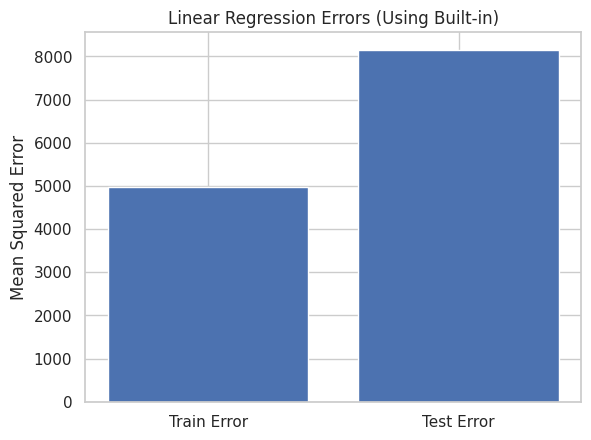

In [8]:
# Apply random projection to reduce dimensions
rp = GaussianRandomProjection(n_components=100)
X_train_rp = rp.fit_transform(X_train)

print("Randomly Projected Data Shape:", X_train_rp.shape)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_rp, y_train)

# Make predictions
y_train_pred = lin_reg.predict(X_train_rp)
y_test_pred = lin_reg.predict(rp.fit_transform(X_test))

# Compute errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Plot train and test errors
plt.bar(['Train Error', 'Test Error'], [train_error, test_error])
plt.ylabel('Mean Squared Error')
plt.title('Linear Regression Errors (Using Built-in)')
plt.show()

# Hyperparameter Tuning 2 : Cross-Validation

Cross-Validation is a technique used to ensure that the model generalizes well to unseen data (more complex than regular validation). The most common form is $k$-fold cross-validation, where the dataset is split into $k$ subsets (folds). The model is trained on $k-1$ folds and evaluated on the remaining fold. This process is repeated $k$ times, with each fold serving as the validation set once.

Mathematically, for each fold $i$:

- Train the model on $k-1$ folds

- Validate the model on the $i$-th fold

The performance metric (e.g., MSE) is computed for each fold, and the average score (other statistics such as the median, percentiles, ... may be used alternatively) is calculated:

$$
\text{MSE}_{\text{cv}} = \frac{1}{k} \sum_{i=1}^{k} \text{MSE}_{\text{val}_i}
$$

Cross-validation helps in reducing the variability of the validation scores and ensures the model is tested on multiple subsets of data, leading to more robust model selection.


**Question :** Implement cross-validation using KFold from sklearn.model_selection and use it to determine a good projection dimension with random projections.

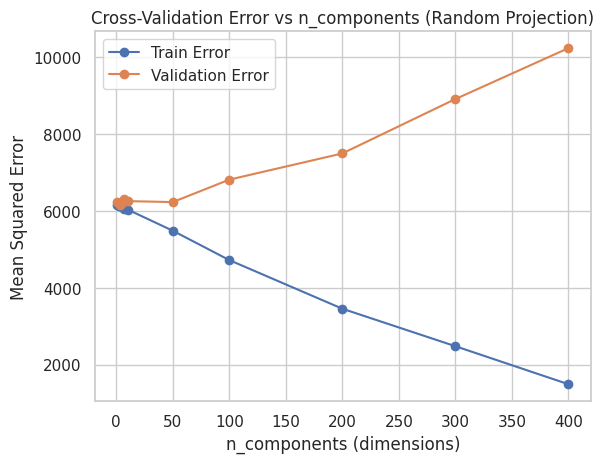

Optimal n_components: 3


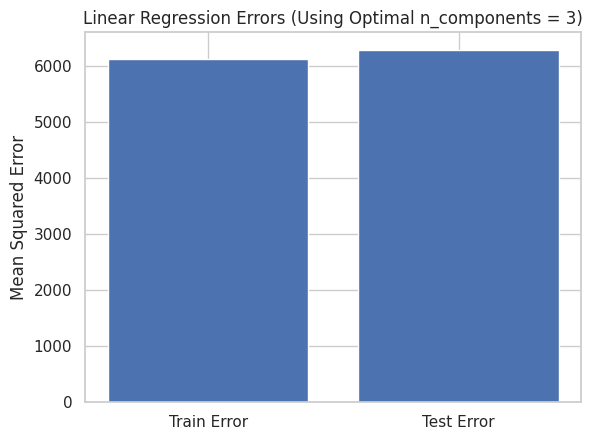

In [18]:
# Define the range of n_components to try
n_components_range = [1, 2, 3, 5, 7, 10, 50, 100, 200, 300, 400]

# Store cross-validation errors for each n_components
cv_train_errors = []
cv_test_errors = []

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n_components in n_components_range:
    train_errors_fold = []
    test_errors_fold = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Apply random projection with n_components
        rp = GaussianRandomProjection(n_components=n_components)
        X_train_rp_fold = rp.fit_transform(X_train_fold)
        X_val_rp_fold = rp.transform(X_val_fold)

        # Train the linear regression model
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_rp_fold, y_train_fold)

        # Make predictions on training and validation folds
        y_train_pred_fold = lin_reg.predict(X_train_rp_fold)
        y_val_pred_fold = lin_reg.predict(X_val_rp_fold)

        # Compute mean squared errors for training and validation folds
        train_error_fold = mean_squared_error(y_train_fold, y_train_pred_fold)
        val_error_fold = mean_squared_error(y_val_fold, y_val_pred_fold)

        train_errors_fold.append(train_error_fold)
        test_errors_fold.append(val_error_fold)

    # Average train and validation errors across the folds
    cv_train_errors.append(np.mean(train_errors_fold))
    cv_test_errors.append(np.mean(test_errors_fold))

# Plot the cross-validation results
plt.plot(n_components_range, cv_train_errors, label="Train Error", marker='o')
plt.plot(n_components_range, cv_test_errors, label="Validation Error", marker='o')
plt.xlabel('n_components (dimensions)')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Error vs n_components (Random Projection)')
plt.legend()
plt.show()

# Find the optimal number of components based on validation error
optimal_n_components = n_components_range[np.argmin(cv_test_errors)]
print(f"Optimal n_components: {optimal_n_components}")

# Re-train the model using the optimal n_components
rp_optimal = GaussianRandomProjection(n_components=optimal_n_components)
X_train_rp_optimal = rp_optimal.fit_transform(X_train)
X_test_rp_optimal = rp_optimal.transform(X_test)

lin_reg_optimal = LinearRegression()
lin_reg_optimal.fit(X_train_rp_optimal, y_train)

# Make predictions on the train and test sets using the optimal n_components
y_train_pred_optimal = lin_reg_optimal.predict(X_train_rp_optimal)
y_test_pred_optimal = lin_reg_optimal.predict(X_test_rp_optimal)

# Compute train and test errors
train_error_optimal = mean_squared_error(y_train, y_train_pred_optimal)
test_error_optimal = mean_squared_error(y_test, y_test_pred_optimal)

# Plot the train and test errors for the optimal n_components
plt.bar(['Train Error', 'Test Error'], [train_error_optimal, test_error_optimal])
plt.ylabel('Mean Squared Error')
plt.title(f'Linear Regression Errors (Using Optimal n_components = {optimal_n_components})')
plt.show()

# Dimensionality Reduction 2 : Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms the original feature space into a new space of principal components. These components are linear combinations of the original features, ordered by the amount of variance they capture.

Mathematically, PCA involves the following steps:

- Center the Data: Subtract the mean from each feature.
    
- Covariance Matrix: Compute the covariance matrix $\Sigma$ of the centered data:

$$
\Sigma = \frac{1}{n} X^T X
$$

- Eigenvalues and Eigenvectors: Compute the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors correspond to the directions of the principal components, and the eigenvalues represent the variance explained by each component.

- Projection: Project the original data XX onto the new space defined by the eigenvectors:

$$
X_{\text{PCA}} = X W
$$

Where $W$ is the matrix of eigenvectors corresponding to the largest eigenvalues.

The key idea behind PCA is that the first few principal components capture most of the variance, so we can reduce dimensionality by retaining only the top components.

**Question :** Implement PCA (you can use PCA from sklearn.decomposition) and compare the performance a linear regression to the version without dimensionality reduction.

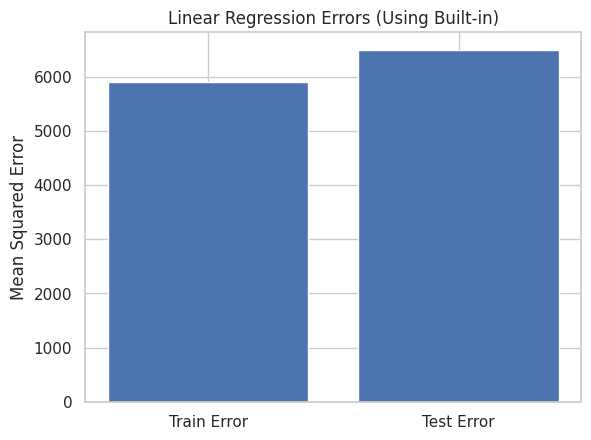

In [9]:
# Apply PCA
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca, y_train)

# Make predictions
y_train_pred = lin_reg.predict(X_train_pca)
y_test_pred = lin_reg.predict(pca.fit_transform(X_test))

# Compute errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Plot train and test errors
plt.bar(['Train Error', 'Test Error'], [train_error, test_error])
plt.ylabel('Mean Squared Error')
plt.title('Linear Regression Errors (Using Built-in)')
plt.show()